In [8]:
import matplotlib.pyplot as plt

In [1]:
import subprocess
import time
def set_env(num_train, num_query, num_base) -> dict[str, str]:
    return {
        "NUM_TRAIN": str(num_train),
        "NUM_QUERY": str(num_query),
        "NUM_BASES": str(num_base),
    }

def experiment(command, env) -> float:
    s = time.perf_counter()
    subprocess.run(command, env=env, stdout=subprocess.DEVNULL)
    return time.perf_counter() - s

In [16]:
import numpy as np
from tqdm.notebook import tqdm
from statistics import mean
num_queries = np.linspace(1, 99, 20, dtype=int)
n = 5
parallel = []
sequential = []

for q in tqdm(num_queries):
    parallel.append(mean(experiment(["./bin/mpar", "+RTS", f"-N6"], set_env(2000, q, 250)) for _ in range(5)))
    sequential.append(mean(experiment("./bin/mseq", set_env(2000, q, 250)) for _ in range(5)))

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Speed up for number of query vectors (n=5)')

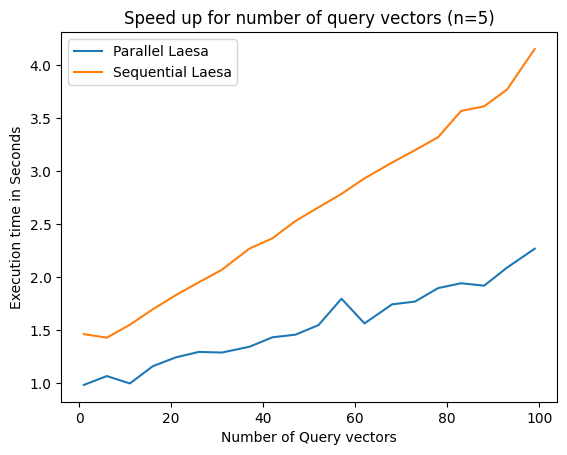

In [17]:
plt.plot(num_queries, parallel, label="Parallel Laesa")
plt.plot(num_queries, sequential, label="Sequential Laesa")
plt.legend()
plt.xlabel("Number of Query vectors")
plt.ylabel("Execution time in Seconds")
plt.title("Speed up for number of query vectors (n=5)")

In [14]:
import numpy as np
from tqdm.notebook import tqdm
from statistics import mean
num_search = np.linspace(100, 5000, 20, dtype=int)
n = 5
parallel = []
sequential = []

for t in tqdm(num_search):
    parallel.append(mean(experiment(["./bin/mpar", "+RTS", f"-N6"], set_env(t, 25, 100)) for _ in range(5)))
    sequential.append(mean(experiment("./bin/mseq", set_env(t, 25, 100)) for _ in range(5)))

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Speed up for number of Training vectors (n=5)')

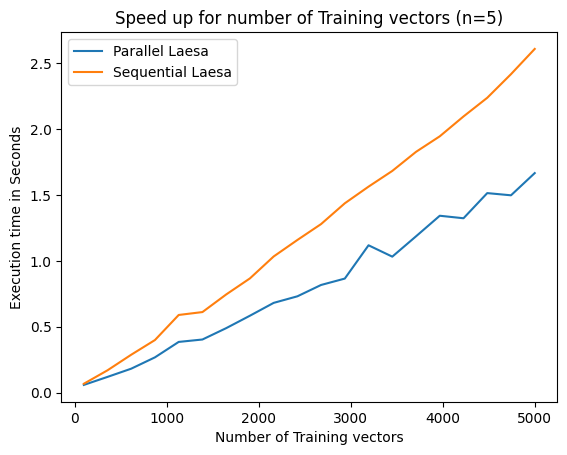

In [15]:
plt.plot(num_search, parallel, label="Parallel Laesa")
plt.plot(num_search, sequential, label="Sequential Laesa")
plt.legend()
plt.xlabel("Number of Training vectors")
plt.ylabel("Execution time in Seconds")
plt.title("Speed up for number of Training vectors (n=5)")

In [7]:
import numpy as np
from tqdm.notebook import tqdm
from statistics import mean
num_basis = np.linspace(50, 1000, 20, dtype=int)
n = 5
parallel = []
sequential = []

for b in tqdm(num_basis):
    parallel.append(mean(experiment("./bin/mpar", set_env(2000, 25, b)) for _ in range(5)))
    sequential.append(mean(experiment("./bin/mseq", set_env(2000, 25, b)) for _ in range(5)))

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Speed up for number of Basis vectors (n=5)')

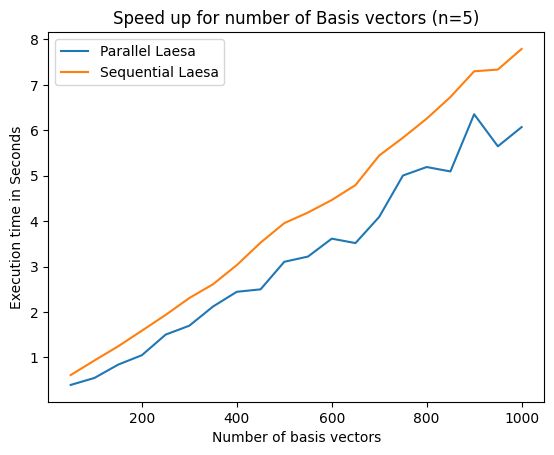

In [8]:
plt.plot(num_basis, parallel, label="Parallel Laesa")
plt.plot(num_basis, sequential, label="Sequential Laesa")
plt.legend()
plt.xlabel("Number of basis vectors")
plt.ylabel("Execution time in Seconds")
plt.title("Speed up for number of Basis vectors (n=5)")

In [12]:
from tqdm.notebook import tqdm
from statistics import mean
cores = [2, 4, 6, 8]
n = 5
parallel = []
sequential = []

for c in tqdm(cores):
    parallel.append(mean(experiment(["./bin/mpar", "+RTS", f"-N{c}"], set_env(2000, 25, 100)) for _ in range(5)))
    sequential.append(mean(experiment(["./bin/mseq", "+RTS", f"-N{c}"], set_env(2000, 25, 100)) for _ in range(5)))

  0%|          | 0/4 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Speed up for number of cores vectors (n=5)')

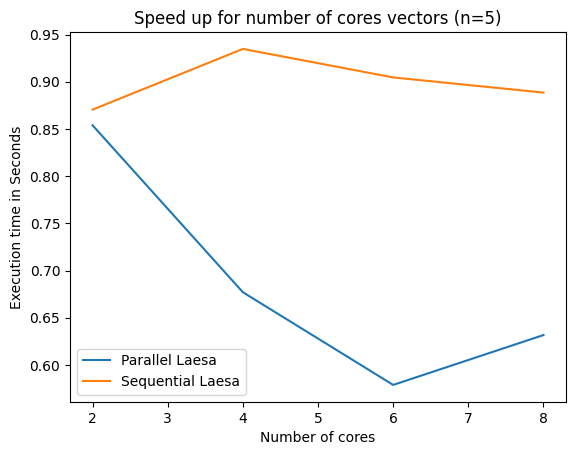

In [13]:
plt.plot(cores, parallel, label="Parallel Laesa")
plt.plot(cores, sequential, label="Sequential Laesa")
plt.legend()
plt.xlabel("Number of cores")
plt.ylabel("Execution time in Seconds")
plt.title("Speed up for number of cores vectors (n=5)")